### Интерполирование функций с помощью интерполяционных формул Ньютону

##### Вариант 17


In [43]:
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [44]:
import numpy as np
import math

n_uzl = 7
x = np.linspace(0.20, 0.55, n_uzl+1)
y = np.array([1.2214, 1.2840, 1.3499, 1.4147, 1.4918, 1.5683, 1.6487, 1.7333])
x_1 = 0.18
x_2 = 0.52
h = 0.05

Создадим таблицу конечных разностей

In [45]:
import pandas as pd

def diff(y, x):
    n = len(y)
    coef = np.zeros([n, n + 1])

    coef[:,1] = y
    coef[:,0] = x
    
    
    
    for j in range(2,n+1):
        for i in range(n-j+1):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1])
            
    return coef

print(pd.DataFrame(diff(y, x), columns=['x', 'y', *[f'Δ{i}y' for i in range(1, len(y))]]))

M = diff(y, x)

      x       y     Δ1y     Δ2y     Δ3y     Δ4y     Δ5y     Δ6y     Δ7y
0  0.20  1.2214  0.0626  0.0033 -0.0044  0.0178 -0.0441  0.0878 -0.1531
1  0.25  1.2840  0.0659 -0.0011  0.0134 -0.0263  0.0437 -0.0653  0.0000
2  0.30  1.3499  0.0648  0.0123 -0.0129  0.0174 -0.0216  0.0000  0.0000
3  0.35  1.4147  0.0771 -0.0006  0.0045 -0.0042  0.0000  0.0000  0.0000
4  0.40  1.4918  0.0765  0.0039  0.0003  0.0000  0.0000  0.0000  0.0000
5  0.45  1.5683  0.0804  0.0042  0.0000  0.0000  0.0000  0.0000  0.0000
6  0.50  1.6487  0.0846  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
7  0.55  1.7333  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000


- Создадим функцию интерполяции по **первой** формуле ньютона
- Создадим функцию для вычисления остаточного члена для **первой** формулы ньютона
- Произведем вычисления для $x_1$
- Построим интерполируемой и интерполирующей функций на одной системе координат

f(x1) = 1.2016587200000002
R(x1) = 0.007389043200000053


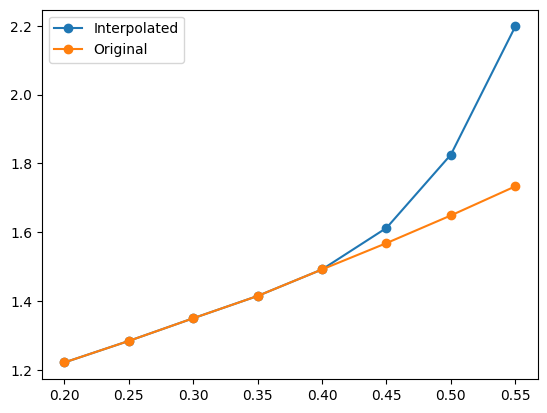

Вывод F_1(0.18) = 1.2016587200000002±1e-4


In [62]:
from matplotlib import pyplot as plt

n = 4
k = 0
x0 = M[k][0]

def F_1(x: float):
    s = M[k][1]
    
    for i in range(1, n+1):
        m = 1
        for j in range(i):
            m *= (x - x0) / h - j
        s += m * M[k][i+1] / np.math.factorial(i)
    
    return s

def R_1(x: float):
    m = 1
    for j in range(n+1):
        m *= (x - x0) / h - j
        
    s = m * M[k][n + 2] / np.math.factorial(n + 1)
    
    return s

x_1 = 0.18
f_1 = F_1(x_1)
r_1 = R_1(x_1)

print(f'f(x1) = {f_1}')
print(f'R(x1) = {r_1}')

inter_y = [F_1(i) for i in x]

plt.plot(x, inter_y, 'o-', label='Interpolated')
plt.plot(x, y, 'o-', label='Original')
plt.legend()
plt.show()

print(f"Вывод F_1({x_1}) = {f_1}±1e{((math.floor(math.log(r_2, 10))))}")

f(0.52) = 1.68216032
R(0.52) = 0.0004935167999999958


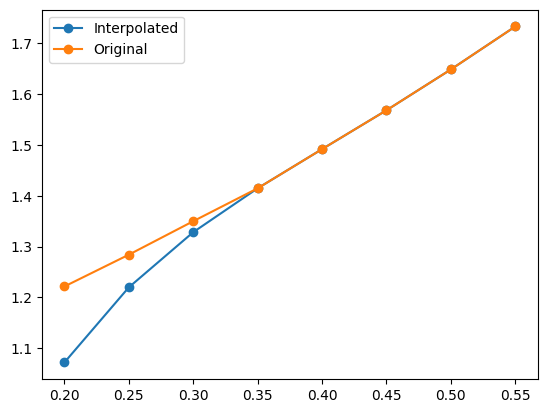

Вывод F_2(0.52) = 1.68216032±1e-4


In [61]:
k = 7
xn = M[k][0]

def F_2(x: float):
  v = M[k][1]
  
  for i in range(1, n+1):
      m = 1
      for j in range(i):
        m *= (x - xn) / h + j
        
      v += m * M[k-i][i+1] / np.math.factorial(i)
  
  return v

def R_2(x: float):
  m = 1
  for j in range(n+1):
      m *= (x - xn) / h + j
  
  v = m * M[k - (n+1)][n + 2] / np.math.factorial(n + 1)
  
  return v

x_2 = 0.52
f_2 = F_2(x_2)
r_2 = R_2(x_2)

print(f'f({x_2}) = {f_2}')
print(f'R({x_2}) = {r_2}')

inter_y = [F_2(i) for i in x]

plt.plot(x, inter_y, 'o-', label='Interpolated')
plt.plot(x, y, 'o-', label='Original')
plt.legend()
plt.show()

print(f"Вывод F_2({x_2}) = {f_2}±1e{((math.floor(math.log(r_2, 10))))}")
